In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot, download_plotlyjs
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [167]:
data = pd.read_csv('/content/drive/My Drive/anomaly_detection_data.csv')

In [168]:
pd.set_option('display.max_columns',200)

In [169]:
data.head()

,date,time,timestamp,input current,input current (Min),input current (Max),input current (StdDev),current data 0x1,current data 0x2,current data 0x3,current data 0x4,current data 0x5,current data 0x6,current data 0x7,current data 0x8,current data 0x9,current data 0x10,current data (Min) 0x1,current data (Min) 0x2,current data (Min) 0x3,current data (Min) 0x4,current data (Min) 0x5,current data (Min) 0x6,current data (Min) 0x7,current data (Min) 0x8,current data (Min) 0x9,current data (Min) 0x10,current data (Mix) 0x1,current data (Mix) 0x2,current data (Mix) 0x3,current data (Mix) 0x4,current data (Mix) 0x5,current data (Mix) 0x6,current data (Mix) 0x7,current data (Mix) 0x8,current data (Mix) 0x9,current data (Mix) 0x10,current data (Std) 0x1,current data (Std) 0x2,current data (Std) 0x3,current data (Std) 0x4,current data (Std) 0x5,current data (Std) 0x6,current data (Std) 0x7,current data (Std) 0x8,current data (Std) 0x9,current data (Std) 0x10,BIT Test results,channel faults,Analog Temp1,Analog Temp2,Analog Flow,Motor Setpoints - Speed,Motor Setpoints - Creep,Motor Setpoints - Accel,Motor Setpoints - Peak I,Motor status,Fault Map,KPH,current,Motor DC bus (Volt),Motor DC bus (Current),Heat Sink Temp,Engineering Sensors 1,Engineering Sensors 2,Engineering Sensors 3,Engineering Sensors 4,Engineering Sensors 5,Engineering Sensors 6,Engineering Sensors 7,Engineering Sensors 8,Engineering Sensors 9,Engineering Sensors 10,Engineering Sensors 11,Engineering Sensors 12,Engineering Sensors 13,motor fault counters 1,motor fault counters 2,motor fault counters 3,motor fault counters 4,motor fault counters 5,motor fault counters 6,motor fault counters 7,motor fault counters 8
0,2017-08-06,01:23:51,2017-08-06 01:23:51,1.30,1.16,1.44,0.07,0.45,0.38,0.0,0.05,0.68,0,0.37,2.61,0.0,1.61,0.40,0.34,0.0,0.00,0.34,0,0.32,2.49,0,1.49,0.56,0.40,0.0,0.12,0.96,0.0,0.46,3.02,0.01,1.69,0.05,0.02,0.0,0.03,0.18,0,0.04,0.16,0.00,0.05,0xe000 7d10,0 0 0 0 0 0 0 0 0 0,17.49,18.12,139.71,0,0,5400,150,0x01,0x00,0.0,4,172,0.0,19.3,25.5,24.4,26.2,19.3,19.1,20.8,20.2,23.5,23.8,23.4,20.0,26.2,33.9,0,0,0,0,0,0,0,0
1,2017-08-06,01:24:01,2017-08-06 01:24:01,1.23,1.12,1.43,0.10,0.43,0.35,0.0,0.06,0.59,0,0.36,2.54,0.0,1.61,0.40,0.29,0.0,0.01,0.35,0,0.29,2.40,0,1.55,0.47,0.40,0.0,0.14,0.99,0.0,0.40,2.68,0.01,1.63,0.02,0.04,0.0,0.04,0.21,0,0.04,0.07,0.01,0.02,0xe000 7d10,0 0 0 0 0 0 0 0 0 0,18.60,18.12,139.71,0,0,5400,150,0x01,0x00,0.0,6,172,0.0,19.3,25.5,24.3,26.2,19.3,19.1,21.1,20.6,23.5,23.7,23.4,20.3,26.1,33.9,0,0,0,0,0,0,0,0
2,2017-08-06,01:24:11,2017-08-06 01:24:11,1.27,1.11,1.39,0.08,0.42,0.36,0.0,0.04,0.71,0,0.36,2.55,0.0,1.62,0.35,0.33,0.0,0.01,0.49,0,0.29,2.46,0,1.59,0.47,0.40,0.0,0.08,0.90,0.0,0.43,2.64,0.00,1.65,0.04,0.02,0.0,0.02,0.12,0,0.04,0.05,0.00,0.02,0xe000 7d10,0 0 0 0 0 0 0 0 0 0,18.60,17.87,139.71,0,0,5400,150,0x01,0x00,0.0,3,172,0.0,19.3,25.7,24.4,26.2,19.2,19.1,20.8,20.9,23.7,23.9,23.4,20.3,26.2,33.9,0,0,0,0,0,0,0,0
3,2017-08-06,01:24:21,2017-08-06 01:24:21,1.27,1.07,1.45,0.10,0.45,0.35,0.0,0.05,0.66,0,0.35,2.61,0.0,1.62,0.41,0.29,0.0,0.02,0.29,0,0.28,2.50,0,1.55,0.52,0.40,0.0,0.10,0.94,0.0,0.40,3.02,0.00,1.64,0.03,0.03,0.0,0.02,0.19,0,0.04,0.16,0.00,0.03,0xe000 7d10,0 0 0 0 0 0 0 0 0 0,18.69,18.07,139.71,0,0,5400,150,0x01,0x00,0.0,5,172,0.0,19.3,25.6,24.5,26.2,19.5,19.3,20.9,20.8,23.9,23.8,23.5,20.5,26.1,33.9,0,0,0,0,0,0,0,0
4,2017-08-06,01:24:31,2017-08-06 01:24:31,1.27,1.11,1.41,0.10,0.42,0.39,0.0,0.06,0.63,0,0.38,2.51,0.0,1.63,0.35,0.33,0.0,0.01,0.39,0,0.29,2.39,0,1.58,0.47,0.45,0.0,0.12,0.84,0.0,0.46,2.61,0.01,1.65,0.03,0.04,0.0,0.04,0.15,0,0.05,0.06,0.00,0.02,0xe000 7d10,0 0 0 0 0 0 0 0 0 0,18.55,18.07,139.71,0,0,5400,150,0x01,0x00,0.0,4,172,0.0,19.3,25.5,24.4,26.2,19.2,18.5,20.7,20.6,23.7,23.8,23.5,20.4,26.2,33.9,0,0,0,0,0,0,0,0


In [170]:
len(data)

42070

In [171]:
data.columns

Index(['date', 'time', 'timestamp', 'input current', 'input current (Min)',
       'input current (Max)', 'input current (StdDev)', 'current data 0x1',
       'current data 0x2', 'current data 0x3', 'current data 0x4',
       'current data 0x5', 'current data 0x6', 'current data 0x7',
       'current data 0x8', 'current data 0x9', 'current data 0x10',
       'current data (Min) 0x1', 'current data (Min) 0x2',
       'current data (Min) 0x3', 'current data (Min) 0x4',
       'current data (Min) 0x5', 'current data (Min) 0x6',
       'current data (Min) 0x7', 'current data (Min) 0x8',
       'current data (Min) 0x9', 'current data (Min) 0x10',
       'current data (Mix) 0x1', 'current data (Mix) 0x2',
       'current data (Mix) 0x3', 'current data (Mix) 0x4',
       'current data (Mix) 0x5', 'current data (Mix) 0x6',
       'current data (Mix) 0x7', 'current data (Mix) 0x8',
       'current data (Mix) 0x9', 'current data (Mix) 0x10',
       'current data (Std) 0x1', 'current data (Std) 0

In [172]:
data = data[['timestamp','input current','Heat Sink Temp' , 'Engineering Sensors 1','Engineering Sensors 2', 'Engineering Sensors 3', 
             'Engineering Sensors 4', 'Engineering Sensors 5',
             'Engineering Sensors 6', 'Engineering Sensors 7', 'Engineering Sensors 8', 'Engineering Sensors 9', 'Engineering Sensors 10', 
             'Engineering Sensors 11', 'Engineering Sensors 12', 'Engineering Sensors 13']]

In [173]:
data.head()

,timestamp,input current,Heat Sink Temp,Engineering Sensors 1,Engineering Sensors 2,Engineering Sensors 3,Engineering Sensors 4,Engineering Sensors 5,Engineering Sensors 6,Engineering Sensors 7,Engineering Sensors 8,Engineering Sensors 9,Engineering Sensors 10,Engineering Sensors 11,Engineering Sensors 12,Engineering Sensors 13
0,2017-08-06 01:23:51,1.30,19.3,25.5,24.4,26.2,19.3,19.1,20.8,20.2,23.5,23.8,23.4,20.0,26.2,33.9
1,2017-08-06 01:24:01,1.23,19.3,25.5,24.3,26.2,19.3,19.1,21.1,20.6,23.5,23.7,23.4,20.3,26.1,33.9
2,2017-08-06 01:24:11,1.27,19.3,25.7,24.4,26.2,19.2,19.1,20.8,20.9,23.7,23.9,23.4,20.3,26.2,33.9
3,2017-08-06 01:24:21,1.27,19.3,25.6,24.5,26.2,19.5,19.3,20.9,20.8,23.9,23.8,23.5,20.5,26.1,33.9
4,2017-08-06 01:24:31,1.27,19.3,25.5,24.4,26.2,19.2,18.5,20.7,20.6,23.7,23.8,23.5,20.4,26.2,33.9


In [174]:
data.isnull().sum()

timestamp                 0
input current             0
Heat Sink Temp            0
Engineering Sensors 1     0
Engineering Sensors 2     0
Engineering Sensors 3     0
Engineering Sensors 4     0
Engineering Sensors 5     0
Engineering Sensors 6     0
Engineering Sensors 7     0
Engineering Sensors 8     0
Engineering Sensors 9     0
Engineering Sensors 10    0
Engineering Sensors 11    0
Engineering Sensors 12    0
Engineering Sensors 13    0
dtype: int64

In [175]:
data_columns_sensors = list(data.columns)[1:]

In [176]:
data_columns_sensors

['input current',
 'Heat Sink Temp',
 'Engineering Sensors 1',
 'Engineering Sensors 2',
 'Engineering Sensors 3',
 'Engineering Sensors 4',
 'Engineering Sensors 5',
 'Engineering Sensors 6',
 'Engineering Sensors 7',
 'Engineering Sensors 8',
 'Engineering Sensors 9',
 'Engineering Sensors 10',
 'Engineering Sensors 11',
 'Engineering Sensors 12',
 'Engineering Sensors 13']

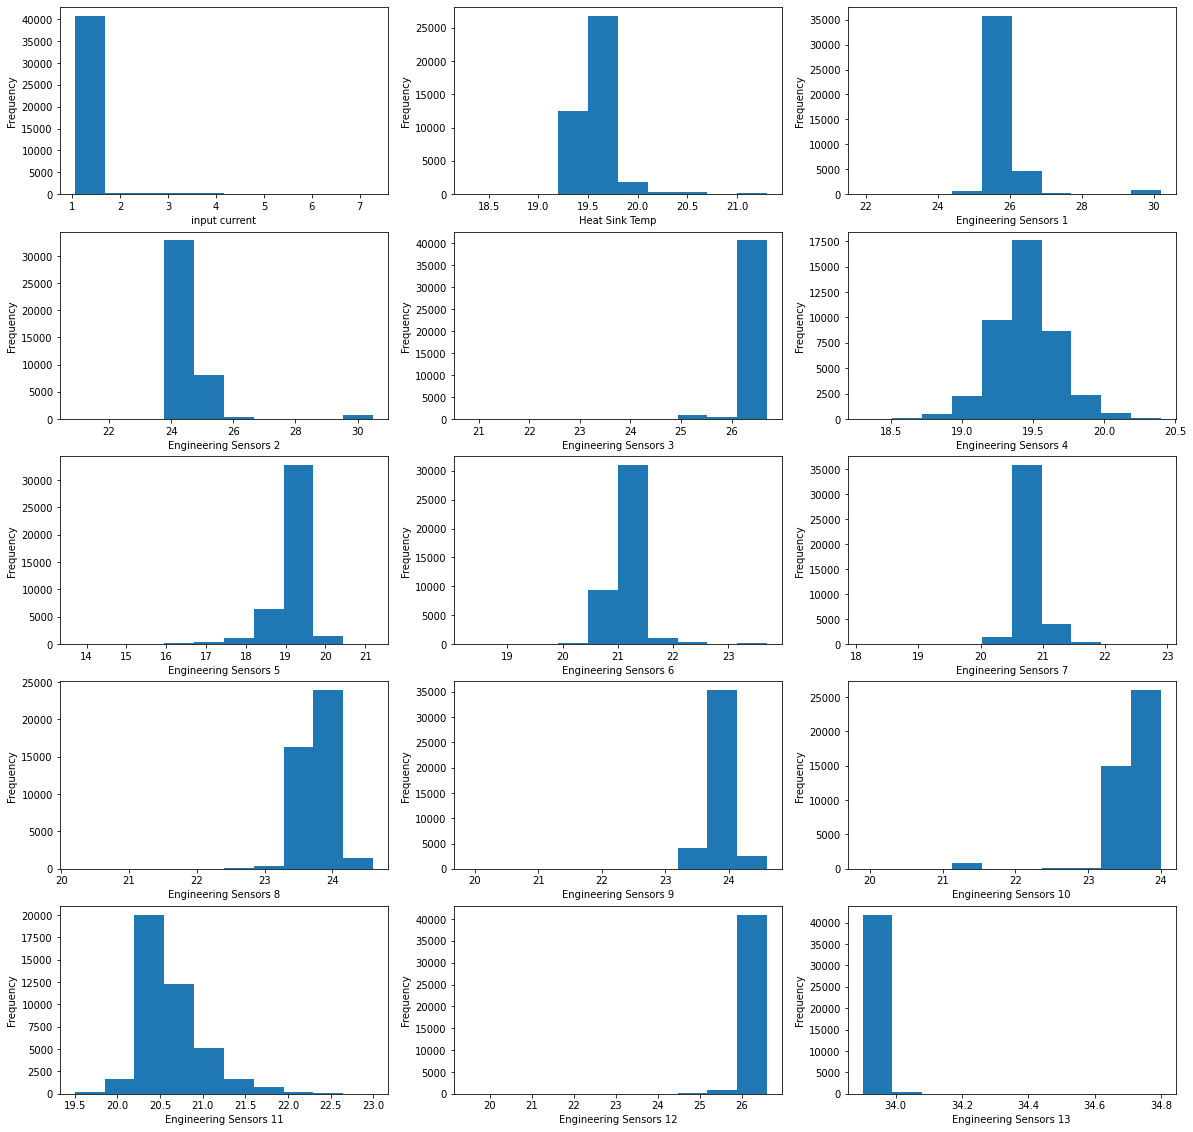

In [177]:
fig, axes = plt.subplots(5,3, figsize=(20,20))
axes = axes.flatten()
for i,ax in enumerate(axes):
    ax.hist(data[data_columns_sensors[i]])
    ax.set_xlabel(data_columns_sensors[i])
    ax.set_ylabel('Frequency')
    #ax.set_title(data_columns_sensors[i])
plt.show()

In [178]:
(data.isnull().sum() / len(data) ) * 100

timestamp                 0.0
input current             0.0
Heat Sink Temp            0.0
Engineering Sensors 1     0.0
Engineering Sensors 2     0.0
Engineering Sensors 3     0.0
Engineering Sensors 4     0.0
Engineering Sensors 5     0.0
Engineering Sensors 6     0.0
Engineering Sensors 7     0.0
Engineering Sensors 8     0.0
Engineering Sensors 9     0.0
Engineering Sensors 10    0.0
Engineering Sensors 11    0.0
Engineering Sensors 12    0.0
Engineering Sensors 13    0.0
dtype: float64

Anomaly Detection

In [179]:
#Decting Anomalies in the data using Isolation Forest
X = data.drop('timestamp',1)
iso_forest = IsolationForest(max_samples=200, random_state = 1)
pred = iso_forest.fit_predict(X)

In [180]:
pd.Series(pred).value_counts()

 1    39437
-1     2633
dtype: int64

The label '1' represents an inlier whereas the label '-1' represents an outlier i.e. anomaly

In [184]:
data2 = data

In [185]:
data2['Outlier'] = pred.tolist()

In [186]:
#Changing the labels so that '1' denotes an outlier and '0' denotes an inlier
data2['Outlier'] = data2['Outlier'].replace(1, 0)
data2['Outlier'] = data2['Outlier'].replace(-1, 1)

In [187]:
data2['Outlier'].value_counts()

0    39437
1     2633
Name: Outlier, dtype: int64

**EDA**

In [188]:
print(str(round(len(data2[data2['Outlier']== 1]) / len(data2) * 100,2)) +'% of data contains anomalies' )

6.26% of data contains anomalies


In [189]:
an =round(len(data2[data2['Outlier']== 1]) / len(data2) * 100,2)
non_an = 100 - an

In [190]:
an

6.26

In [191]:
ano_df = pd.DataFrame()
ano_df['Data'] = ['Non-Anomalous','Anomalous']
ano_df['Percent'] = [non_an, an]
ano_df

,Data,Percent
0,Non-Anomalous,93.74
1,Anomalous,6.26


In [192]:
fig_pie = px.pie(ano_df, values = 'Percent', names ='Data', title = 'Distribution of data')
fig_pie.show()

In [193]:
data2.head()

,timestamp,input current,Heat Sink Temp,Engineering Sensors 1,Engineering Sensors 2,Engineering Sensors 3,Engineering Sensors 4,Engineering Sensors 5,Engineering Sensors 6,Engineering Sensors 7,Engineering Sensors 8,Engineering Sensors 9,Engineering Sensors 10,Engineering Sensors 11,Engineering Sensors 12,Engineering Sensors 13,Outlier
0,2017-08-06 01:23:51,1.30,19.3,25.5,24.4,26.2,19.3,19.1,20.8,20.2,23.5,23.8,23.4,20.0,26.2,33.9,0
1,2017-08-06 01:24:01,1.23,19.3,25.5,24.3,26.2,19.3,19.1,21.1,20.6,23.5,23.7,23.4,20.3,26.1,33.9,0
2,2017-08-06 01:24:11,1.27,19.3,25.7,24.4,26.2,19.2,19.1,20.8,20.9,23.7,23.9,23.4,20.3,26.2,33.9,0
3,2017-08-06 01:24:21,1.27,19.3,25.6,24.5,26.2,19.5,19.3,20.9,20.8,23.9,23.8,23.5,20.5,26.1,33.9,0
4,2017-08-06 01:24:31,1.27,19.3,25.5,24.4,26.2,19.2,18.5,20.7,20.6,23.7,23.8,23.5,20.4,26.2,33.9,0


In [194]:
data2['timestamp'] = pd.to_datetime(data2['timestamp'])

In [195]:
import locale

In [196]:
locale.setlocale(locale.LC_ALL,'en_US.UTF-8')

'en_US.UTF-8'

In [197]:
data2['Month'] = data2['timestamp'].dt.month_name(locale = 'en_US.UTF-8')
data2['Day'] = data2['timestamp'].dt.day_name(locale = 'en_US.UTF-8')
data2['Hour'] = data2['timestamp'].dt.hour 
data2['Minutes'] = data2['timestamp'].dt.minute


In [198]:
data2.head()

,timestamp,input current,Heat Sink Temp,Engineering Sensors 1,Engineering Sensors 2,Engineering Sensors 3,Engineering Sensors 4,Engineering Sensors 5,Engineering Sensors 6,Engineering Sensors 7,Engineering Sensors 8,Engineering Sensors 9,Engineering Sensors 10,Engineering Sensors 11,Engineering Sensors 12,Engineering Sensors 13,Outlier,Month,Day,Hour,Minutes
0,2017-08-06 01:23:51,1.30,19.3,25.5,24.4,26.2,19.3,19.1,20.8,20.2,23.5,23.8,23.4,20.0,26.2,33.9,0,August,Sunday,1,23
1,2017-08-06 01:24:01,1.23,19.3,25.5,24.3,26.2,19.3,19.1,21.1,20.6,23.5,23.7,23.4,20.3,26.1,33.9,0,August,Sunday,1,24
2,2017-08-06 01:24:11,1.27,19.3,25.7,24.4,26.2,19.2,19.1,20.8,20.9,23.7,23.9,23.4,20.3,26.2,33.9,0,August,Sunday,1,24
3,2017-08-06 01:24:21,1.27,19.3,25.6,24.5,26.2,19.5,19.3,20.9,20.8,23.9,23.8,23.5,20.5,26.1,33.9,0,August,Sunday,1,24
4,2017-08-06 01:24:31,1.27,19.3,25.5,24.4,26.2,19.2,18.5,20.7,20.6,23.7,23.8,23.5,20.4,26.2,33.9,0,August,Sunday,1,24


In [199]:
data2['Date'] = data['timestamp'].dt.date
pd.Series(data2['Date']).value_counts()

2017-08-06    9056
2017-08-07    8729
2017-08-10    8640
2017-08-09    8562
2017-08-08    6300
2014-09-21     783
Name: Date, dtype: int64

The given dataset is of 6 days.
The data set consists of sensor readings on 21st-Sept-2014 and from 6th-Aug-2017 to 10th-Aug-2017

In [200]:
#Subsetting the dataframe to form a new dataframme consisting of just tthe anomalies
anomaly = data2[data2['Outlier'] == 1]

In [201]:
time_series = anomaly.groupby('Date')['Outlier'].count().reset_index()
time_series

,Date,Outlier
0,2014-09-21,783
1,2017-08-06,279
2,2017-08-07,370
3,2017-08-08,416
4,2017-08-09,784
5,2017-08-10,1


In [202]:
trace1 = go.Scatter(x = time_series['Date'],
                    y = time_series['Outlier'],
                    )
layout = go.Layout(title = 'Time Series analysis of anomalies for particular dates',
                   xaxis_title = 'Date',
                   yaxis_title = 'Anomalies count')
fig = go.Figure(data = [trace1], layout = layout)
plotly.offline.iplot(fig)

Just hover the cursor over the dots on the above plot to visualise the anomalies count.

In [203]:
time_series_2017 = time_series.iloc[1:,:]
time_series_2017

,Date,Outlier
1,2017-08-06,279
2,2017-08-07,370
3,2017-08-08,416
4,2017-08-09,784
5,2017-08-10,1


In [204]:
trace2 = go.Scatter(x = time_series_2017['Date'],
                    y = time_series_2017['Outlier'],
                    )
layout2 = go.Layout(title = 'Time Series analysis of anomalies for the year 2017',
                   xaxis_title = 'Date',
                   yaxis_title = 'Anomalies count')
fig2 = go.Figure(data = [trace2], layout = layout2)
plotly.offline.iplot(fig2)

Just hover the cursor over the dots on the above plot to visualise the anomalies count.

Text(0.5, 1.0, 'Bar Chart Anomaly analysis for particular dates')

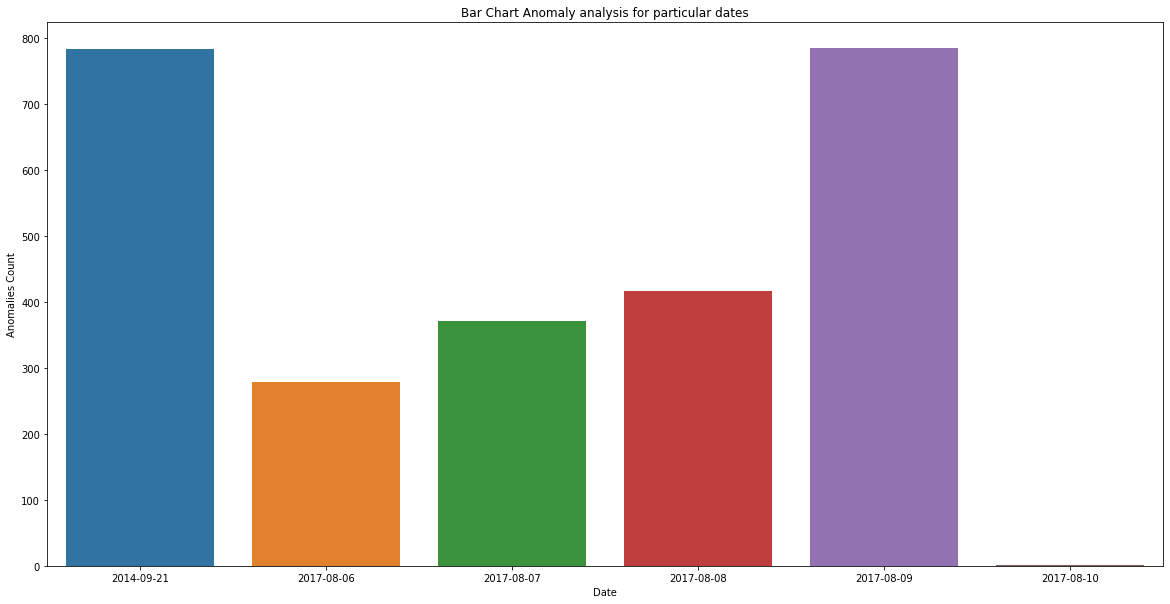

In [205]:
plt.figure(figsize=(20,10))
sns.barplot(time_series['Date'], time_series['Outlier'])
plt.ylabel('Anomalies Count')
plt.xlabel('Date')
plt.title('Bar Chart Anomaly analysis for particular dates')

In [206]:
data3 = data2.copy()
data3['Month'] = data3['timestamp'].dt.month
data3['Day'] = data3['timestamp'].dt.day

Text(0.5, 1.0, 'Correlation among numeric features')

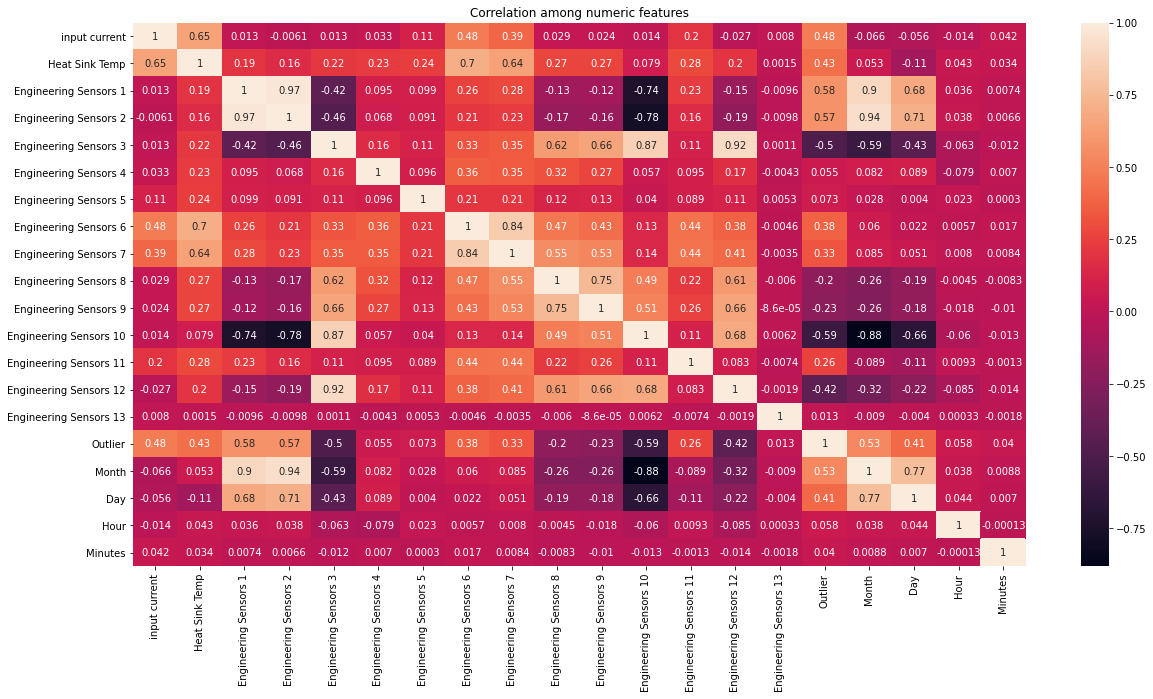

In [207]:
numeric_data = data3._get_numeric_data()
plt.figure(figsize=(20,10))
sns.heatmap(numeric_data.corr(), annot=True)
plt.title('Correlation among numeric features')

It can be seen that anomaly in the data is well correlated with the month as well as day

In [208]:
type(data2['Hour'])

pandas.core.series.Series

In [209]:
data2['Hour'] = np.array(data2['Hour']).astype(int)

In [210]:
time_of_the_day = []
for i in data2['Hour']:
    if i in range(6,12):
        time_of_the_day.append('Morning')
    elif i in range(12,17):
        time_of_the_day.append('Afternoon')
    elif i in range(17, 20):
        time_of_the_day.append('Evening')
    else:
        time_of_the_day.append('Night')

In [211]:
data2['Time of the Day'] = time_of_the_day

In [212]:
data2.head()

,timestamp,input current,Heat Sink Temp,Engineering Sensors 1,Engineering Sensors 2,Engineering Sensors 3,Engineering Sensors 4,Engineering Sensors 5,Engineering Sensors 6,Engineering Sensors 7,Engineering Sensors 8,Engineering Sensors 9,Engineering Sensors 10,Engineering Sensors 11,Engineering Sensors 12,Engineering Sensors 13,Outlier,Month,Day,Hour,Minutes,Date,Time of the Day
0,2017-08-06 01:23:51,1.30,19.3,25.5,24.4,26.2,19.3,19.1,20.8,20.2,23.5,23.8,23.4,20.0,26.2,33.9,0,August,Sunday,1,23,2017-08-06,Night
1,2017-08-06 01:24:01,1.23,19.3,25.5,24.3,26.2,19.3,19.1,21.1,20.6,23.5,23.7,23.4,20.3,26.1,33.9,0,August,Sunday,1,24,2017-08-06,Night
2,2017-08-06 01:24:11,1.27,19.3,25.7,24.4,26.2,19.2,19.1,20.8,20.9,23.7,23.9,23.4,20.3,26.2,33.9,0,August,Sunday,1,24,2017-08-06,Night
3,2017-08-06 01:24:21,1.27,19.3,25.6,24.5,26.2,19.5,19.3,20.9,20.8,23.9,23.8,23.5,20.5,26.1,33.9,0,August,Sunday,1,24,2017-08-06,Night
4,2017-08-06 01:24:31,1.27,19.3,25.5,24.4,26.2,19.2,18.5,20.7,20.6,23.7,23.8,23.5,20.4,26.2,33.9,0,August,Sunday,1,24,2017-08-06,Night


In [213]:
anomaly = data2[data2['Outlier'] == 1]
anomaly['Year'] = anomaly['timestamp'].dt.year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [214]:
anomaly['Day int'] = anomaly['timestamp'].dt.day

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [217]:
anomaly_daytime = pd.DataFrame()
time =[]
cnt =[]
ano_daytime = dict(anomaly['Time of the Day'].value_counts())
for key, value in ano_daytime.items():
  time.append(key)
  cnt.append(value)
anomaly_daytime['Time of the Day'] = time
anomaly_daytime['Anomalies count'] = cnt
anomaly_daytime

,Time of the Day,Anomalies count
0,Afternoon,1156
1,Morning,825
2,Evening,640
3,Night,12


Text(0.5, 1.0, 'Anomalies analysis according to time of the day')

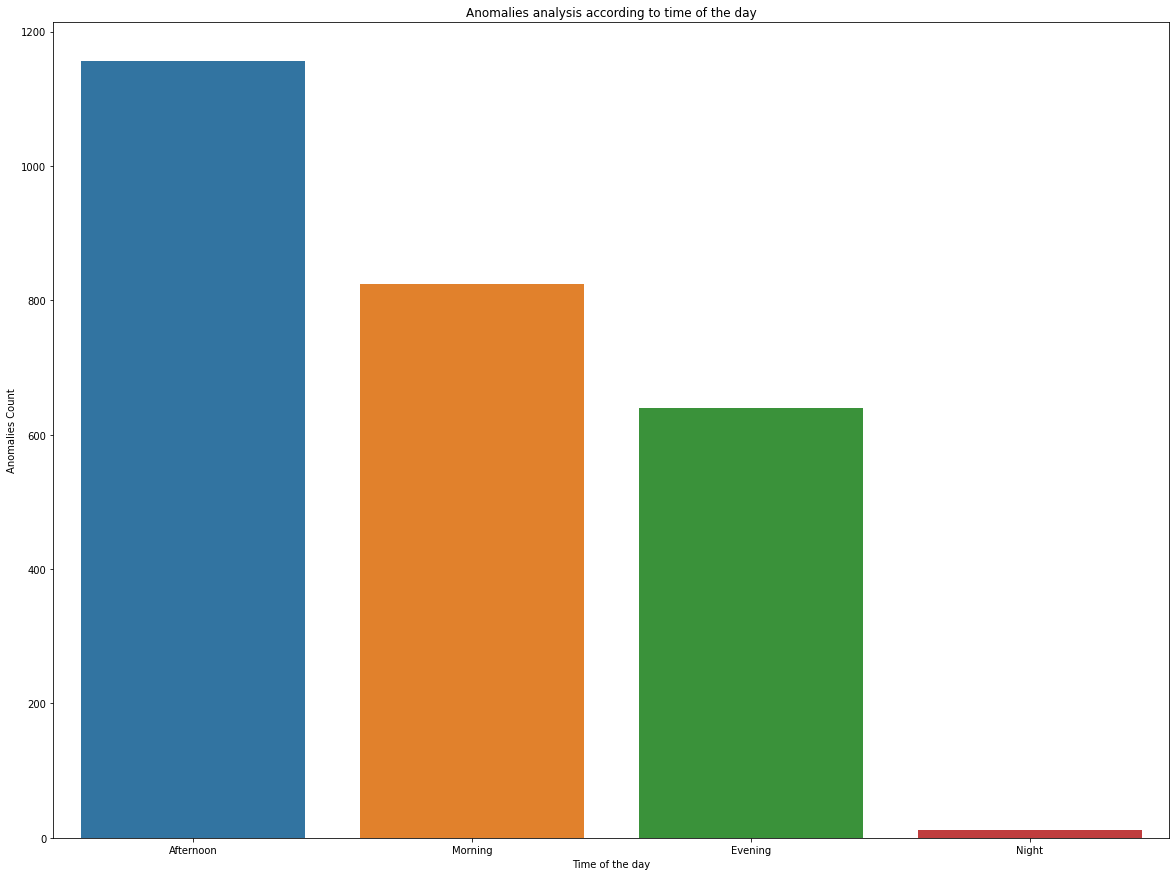

In [222]:
plt.figure(figsize=(20,15))
sns.barplot(anomaly_daytime['Time of the Day'], anomaly_daytime['Anomalies count'])
plt.xlabel('Time of the day')
plt.ylabel('Anomalies Count')
plt.title('Anomalies analysis according to time of the day')

In [215]:
anomaly_time = anomaly.groupby(['Day', 'Time of the Day'])['Outlier'].count().reset_index()
anomaly_time

,Day,Time of the Day,Outlier
0,Monday,Afternoon,266
1,Monday,Evening,1
2,Monday,Morning,103
3,Sunday,Afternoon,783
4,Sunday,Morning,269
5,Sunday,Night,10
6,Thursday,Evening,1
7,Tuesday,Evening,413
8,Tuesday,Morning,1
9,Tuesday,Night,2


In [216]:
fig3 = px.bar(anomaly_time,
       x = 'Day',
       y = 'Outlier',
       color ='Time of the Day',
       barmode ='group',
       title = 'Anomaly analysis according to the time of the day',
       labels = {'Date':'Date',
                 'Outlier': 'Anomalies Count',
                 'Time of the Day': 'Time of the Day'
                 }
       )
plotly.offline.iplot(fig3)

In [51]:
anomaly_2014 = anomaly[anomaly['Year'] == 2014]
anomaly_time_2014 = anomaly_2014.groupby(['Day', 'Time of the Day'])['Outlier'].count().reset_index()
anomaly_time_2014

,Day,Time of the Day,Outlier
0,Sunday,Afternoon,783


In 2014 (on 21st-Sept-2014) all the anomalies occurred during the afternoon i.e. between 12:00 pm to 4:59 pm

In [52]:
anomaly_2017 = anomaly[anomaly['Year'] == 2017]
anomaly_time_2017 = anomaly_2017.groupby(['Day int', 'Time of the Day'])['Outlier'].count().reset_index()
anomaly_time_2017

,Day int,Time of the Day,Outlier
0,6,Morning,269
1,6,Night,10
2,7,Afternoon,266
3,7,Evening,1
4,7,Morning,103
5,8,Evening,413
6,8,Morning,1
7,8,Night,2
8,9,Afternoon,107
9,9,Evening,225


In [53]:
fig4 = px.bar(anomaly_time_2017,
       x = 'Day int',
       y = 'Outlier',
       color ='Time of the Day',
       barmode ='group',
       title = 'Anomaly analysis according to the time of the day for August 2017',
       labels = {'Day int':'Date',
                 'Outlier': 'Anomalies Count',
                 'Time of the Day': 'Time of the Day'
                 }
       )
plotly.offline.iplot(fig4)

In [54]:
normal_data  = data2[data2['Outlier'] == 0]
print('Input current range for normal readings: ' + str(min(normal_data['input current'])) +'-'+ str(max(normal_data['input current'])))
print('Input current range when anomaly is detected: ' + str(min(anomaly['input current'])) +'-'+ str(max(anomaly['input current'])))

Input current range for normal readings: 1.14-4.47
Input current range when anomaly is detected: 1.05-7.28


In [55]:
anomaly_range_upper = anomaly[anomaly['input current'] > 4.47]
anomaly_range_lower  = anomaly[anomaly['input current'] < 1.14]
print(str(round((len(anomaly_range_upper) + len(anomaly_range_lower)) / len(anomaly),2) *100) + '% of the total anomalies occured when the input current was out of the normal range')

10.0% of the total anomalies occured when the input current was out of the normal range


In [56]:
ano_per = round((len(anomaly_range_upper) + len(anomaly_range_lower)) / len(anomaly),2) *100
nor_per = 100 - ano_per
ano_ip = pd.DataFrame()
ano_ip['Input current range'] = ['Normal range of i/p current (1.14 - 4.47)', 'Abnormal range of i/p current (<1.14 or >4.47)']
ano_ip['Percentage'] = [nor_per,ano_per]

In [57]:
fig_pie2 = px.pie(ano_ip, values = 'Percentage', names='Input current range', title = 'Analysis of anomalies for the range of input current')
plotly.offline.iplot(fig_pie2)

In [58]:
categorical_columns = data2.select_dtypes(include = ['object']).columns
categorical_columns

Index(['Month', 'Day', 'Date', 'Time of the Day'], dtype='object')

In [59]:
categorical_columns = categorical_columns.drop('Date')
categorical_columns

Index(['Month', 'Day', 'Time of the Day'], dtype='object')

In [60]:
for i in range(len(categorical_columns)):
    one_hot = pd.get_dummies(data2[categorical_columns[i]])
    data2 = pd.concat([data2, one_hot], 1)
    data2.drop(categorical_columns[i], 1, inplace = True)

In [61]:
data2.head()

,timestamp,input current,Heat Sink Temp,Engineering Sensors 1,Engineering Sensors 2,Engineering Sensors 3,Engineering Sensors 4,Engineering Sensors 5,Engineering Sensors 6,Engineering Sensors 7,Engineering Sensors 8,Engineering Sensors 9,Engineering Sensors 10,Engineering Sensors 11,Engineering Sensors 12,Engineering Sensors 13,Outlier,Hour,Minutes,Date,August,September,Monday,Sunday,Thursday,Tuesday,Wednesday,Afternoon,Evening,Morning,Night
0,2017-08-06 01:23:51,1.30,19.3,25.5,24.4,26.2,19.3,19.1,20.8,20.2,23.5,23.8,23.4,20.0,26.2,33.9,0,1,23,2017-08-06,1,0,0,1,0,0,0,0,0,0,1
1,2017-08-06 01:24:01,1.23,19.3,25.5,24.3,26.2,19.3,19.1,21.1,20.6,23.5,23.7,23.4,20.3,26.1,33.9,0,1,24,2017-08-06,1,0,0,1,0,0,0,0,0,0,1
2,2017-08-06 01:24:11,1.27,19.3,25.7,24.4,26.2,19.2,19.1,20.8,20.9,23.7,23.9,23.4,20.3,26.2,33.9,0,1,24,2017-08-06,1,0,0,1,0,0,0,0,0,0,1
3,2017-08-06 01:24:21,1.27,19.3,25.6,24.5,26.2,19.5,19.3,20.9,20.8,23.9,23.8,23.5,20.5,26.1,33.9,0,1,24,2017-08-06,1,0,0,1,0,0,0,0,0,0,1
4,2017-08-06 01:24:31,1.27,19.3,25.5,24.4,26.2,19.2,18.5,20.7,20.6,23.7,23.8,23.5,20.4,26.2,33.9,0,1,24,2017-08-06,1,0,0,1,0,0,0,0,0,0,1


In [62]:
data2['Outlier'].value_counts()

0    39437
1     2633
Name: Outlier, dtype: int64

In [64]:
data2.columns

Index(['timestamp', 'input current', 'Heat Sink Temp', 'Engineering Sensors 1',
       'Engineering Sensors 2', 'Engineering Sensors 3',
       'Engineering Sensors 4', 'Engineering Sensors 5',
       'Engineering Sensors 6', 'Engineering Sensors 7',
       'Engineering Sensors 8', 'Engineering Sensors 9',
       'Engineering Sensors 10', 'Engineering Sensors 11',
       'Engineering Sensors 12', 'Engineering Sensors 13', 'Outlier', 'Hour',
       'Minutes', 'Date', 'August', 'September', 'Monday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Afternoon', 'Evening', 'Morning',
       'Night'],
      dtype='object')

In [67]:
sensors =['Engineering Sensors 1', 'Engineering Sensors 2', 'Engineering Sensors 3', 'Engineering Sensors 4', 'Engineering Sensors 5',
          'Engineering Sensors 6', 'Engineering Sensors 7', 'Engineering Sensors 8', 'Engineering Sensors 9',
          'Engineering Sensors 10', 'Engineering Sensors 11','Engineering Sensors 12', 'Engineering Sensors 13',]

In [68]:
sen =[]
an = []
nor =[]
for i in range(len(sensors)):
  ano = anomaly[sensors[i]]
  normal = normal_data[sensors[i]]
  
  normal_min = min(normal)
  normal_max = max(normal)
  nor_range = (normal_min, normal_max)

  ano_min = min(ano)
  ano_max = max(ano)
  ano_range = (ano_min, ano_max)
  
  sen.append(sensors[i])
  an.append(str(ano_range))
  nor.append(str(nor_range))
  

In [69]:
new_df = pd.DataFrame()
new_df['Sensor'] = sen
new_df['Non-Anomalous readings range'] = nor
new_df['Anomalous readings range'] = an
new_df

,Sensor,Non-Anomalous readings range,Anomalous readings range
0,Engineering Sensors 1,"(24.6, 26.9)","(21.9, 30.2)"
1,Engineering Sensors 2,"(23.5, 26.1)","(20.9, 30.5)"
2,Engineering Sensors 3,"(25.8, 26.6)","(20.8, 26.7)"
3,Engineering Sensors 4,"(18.5, 20.4)","(18.3, 20.4)"
4,Engineering Sensors 5,"(13.7, 21.0)","(14.6, 21.2)"
5,Engineering Sensors 6,"(20.3, 22.3)","(18.3, 23.7)"
6,Engineering Sensors 7,"(20.0, 21.7)","(18.1, 22.9)"
7,Engineering Sensors 8,"(23.0, 24.6)","(20.2, 24.6)"
8,Engineering Sensors 9,"(23.1, 24.6)","(19.9, 24.6)"
9,Engineering Sensors 10,"(23.0, 23.9)","(19.9, 24.0)"


**Building Machine Learning Models**

In [71]:
X = data2.drop(['timestamp', 'Outlier', 'Date'],1)
y = data2['Outlier']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify=y)

In [73]:
kme = KMeans(n_clusters=2)
kme.fit(X_train, y_train)
kme_pred = kme.predict(X_test)

In [74]:
kme_acc = accuracy_score(y_test, kme_pred)
kme_f1 = f1_score(y_test, kme_pred, average ='macro')
kme_rmse = mean_squared_error(y_test, kme_pred, squared= False)
print('Metrics for K Means')
print('Accuracy: ', kme_acc)
print('F1 score: ', kme_f1)
print('RMSE: ', kme_rmse)

Metrics for K Means
Accuracy:  0.5027335393391966
F1 score:  0.3902391641724864
RMSE:  0.7051712279019922


In [75]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

In [76]:
tree_acc = accuracy_score(y_test, tree_pred)
tree_f1 = f1_score(y_test, tree_pred)
tree_rmse = mean_squared_error(y_test, tree_pred, squared= False)
print('Metrics for Decision Tree Classifier')
print('Accuracy: ', tree_acc)
print('F1 score: ', tree_f1)
print('RMSE: ', tree_rmse)

Metrics for Decision Tree Classifier
Accuracy:  0.9914428333729498
F1 score:  0.9309021113243762
RMSE:  0.09250495460811899


In [77]:
rf = RandomForestClassifier(random_state=6)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [78]:
rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred, squared= False)
print('Metrics for Random Forest Classifier')
print('Accuracy: ', rf_acc)
print('F1 score: ', rf_f1)
print('RMSE: ', rf_rmse)

Metrics for Random Forest Classifier
Accuracy:  0.9933444259567388
F1 score:  0.9459459459459458
RMSE:  0.08158170164480041


In [98]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [99]:
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared= False)
print('Metrics for XGBoost Classifier')
print('Accuracy: ', xgb_acc)
print('F1 score: ', xgb_f1)
print('RMSE: ', xgb_rmse)

Metrics for XGBoost Classifier
Accuracy:  0.9940575231756597
F1 score:  0.9515503875968991
RMSE:  0.07708746217343249


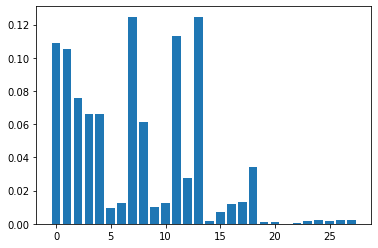

In [100]:
rf_importance = rf.feature_importances_
plt.bar([x for x in range(len(rf_importance))], rf_importance)
plt.show()

In [101]:
X.head()

,input current,Heat Sink Temp,Engineering Sensors 1,Engineering Sensors 2,Engineering Sensors 3,Engineering Sensors 4,Engineering Sensors 5,Engineering Sensors 6,Engineering Sensors 7,Engineering Sensors 8,Engineering Sensors 9,Engineering Sensors 10,Engineering Sensors 11,Engineering Sensors 12,Engineering Sensors 13,Hour,Minutes,August,September,Monday,Sunday,Thursday,Tuesday,Wednesday,Afternoon,Evening,Morning,Night
0,1.30,19.3,25.5,24.4,26.2,19.3,19.1,20.8,20.2,23.5,23.8,23.4,20.0,26.2,33.9,1,23,1,0,0,1,0,0,0,0,0,0,1
1,1.23,19.3,25.5,24.3,26.2,19.3,19.1,21.1,20.6,23.5,23.7,23.4,20.3,26.1,33.9,1,24,1,0,0,1,0,0,0,0,0,0,1
2,1.27,19.3,25.7,24.4,26.2,19.2,19.1,20.8,20.9,23.7,23.9,23.4,20.3,26.2,33.9,1,24,1,0,0,1,0,0,0,0,0,0,1
3,1.27,19.3,25.6,24.5,26.2,19.5,19.3,20.9,20.8,23.9,23.8,23.5,20.5,26.1,33.9,1,24,1,0,0,1,0,0,0,0,0,0,1
4,1.27,19.3,25.5,24.4,26.2,19.2,18.5,20.7,20.6,23.7,23.8,23.5,20.4,26.2,33.9,1,24,1,0,0,1,0,0,0,0,0,0,1


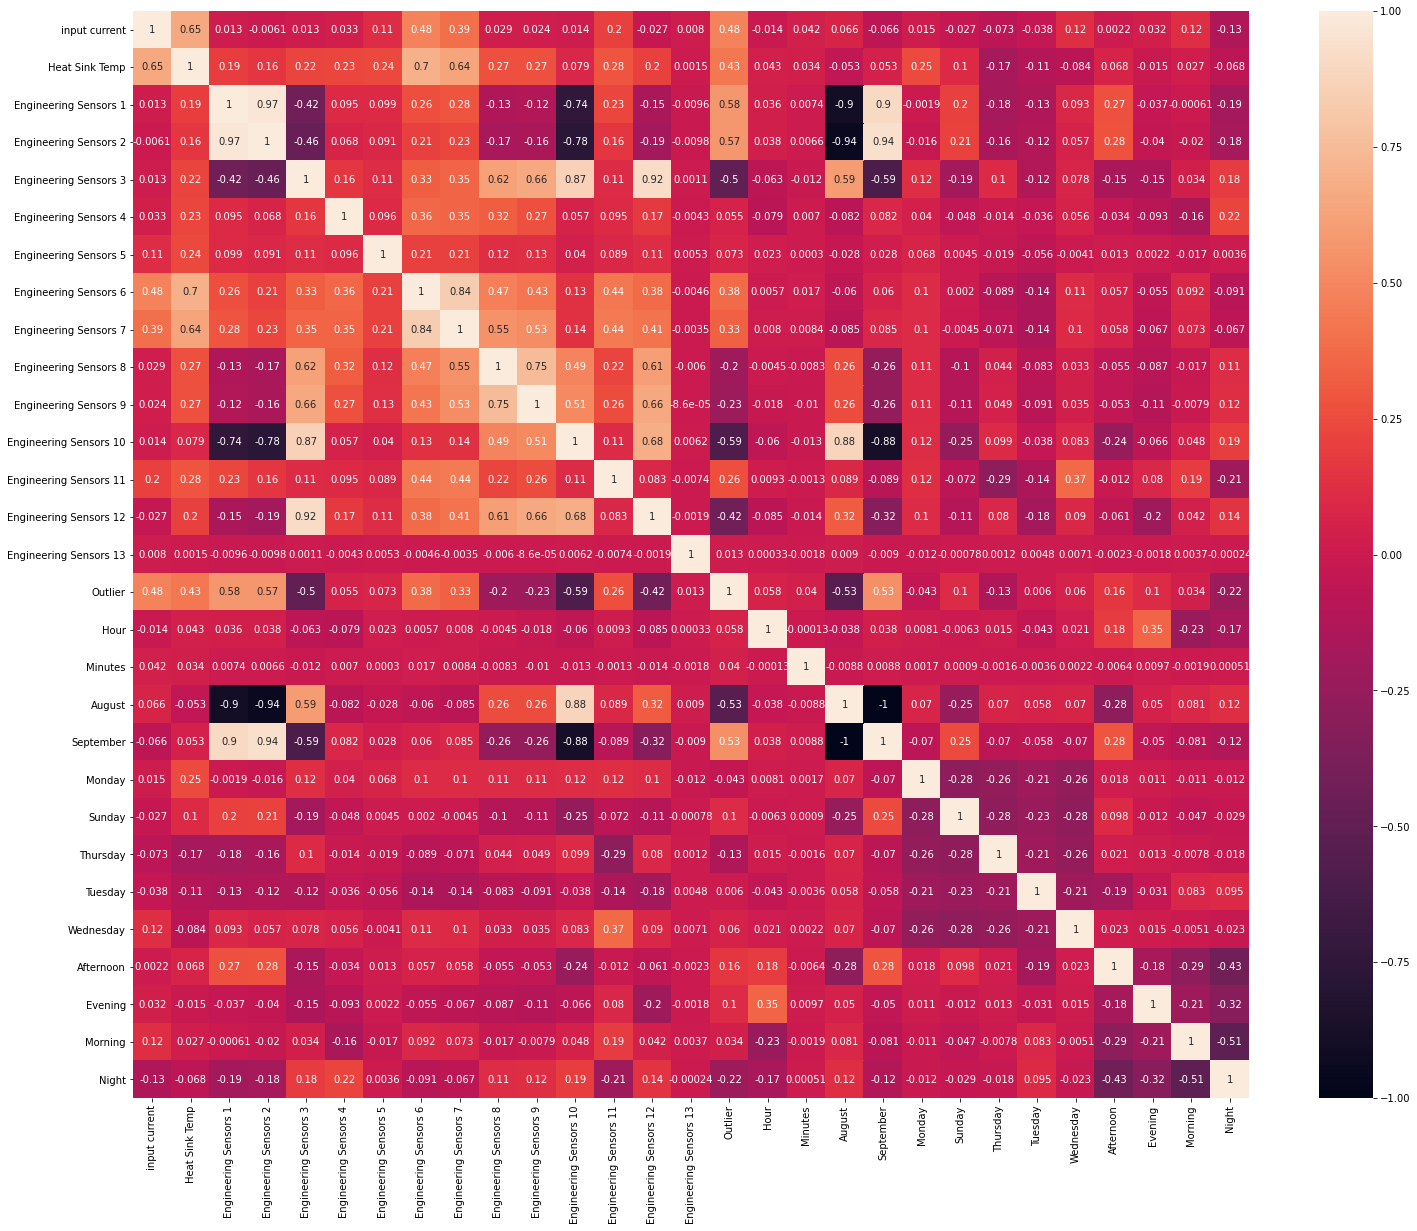

In [102]:
data2_num = data2._get_numeric_data()
plt.figure(figsize=(25,20))
sns.heatmap(data2.corr(), annot=True)

In [ ]:
X_rf = X.iloc[:, :-10]
X_rf.drop('Engineering Sensors 5',1, inplace=True)

In [ ]:
X_rf.columns

In [105]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_rf,y, test_size = 0.2, random_state = 42, stratify=y)

In [106]:
rf2 = RandomForestClassifier(random_state=6)
rf2.fit(X_train2,y_train2)
rf2_pred = rf2.predict(X_test2)

In [107]:
rf2_acc = accuracy_score(y_test2, rf2_pred)
rf2_f1 = f1_score(y_test2, rf2_pred)
rf2_rmse = mean_squared_error(y_test2, rf2_pred, squared= False)
print('Metrics for Random Forest Classifier after dropping less important features')
print('Accuracy: ', rf2_acc)
print('F1 score: ', rf2_f1)
print('RMSE: ', rf2_rmse)

Metrics for Random Forest Classifier after dropping less important features
Accuracy:  0.9945329213216069
F1 score:  0.9557692307692308
RMSE:  0.07393969622870487


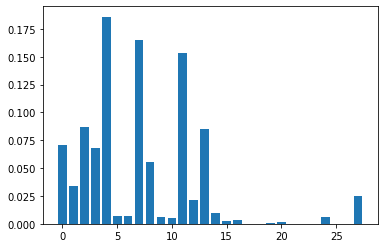

In [108]:
xgb_importance = xgb.feature_importances_
plt.bar([x for x in range(len(xgb_importance))], xgb_importance)
plt.show()

In [109]:
X.head()

,input current,Heat Sink Temp,Engineering Sensors 1,Engineering Sensors 2,Engineering Sensors 3,Engineering Sensors 4,Engineering Sensors 5,Engineering Sensors 6,Engineering Sensors 7,Engineering Sensors 8,Engineering Sensors 9,Engineering Sensors 10,Engineering Sensors 11,Engineering Sensors 12,Engineering Sensors 13,Hour,Minutes,August,September,Monday,Sunday,Thursday,Tuesday,Wednesday,Afternoon,Evening,Morning,Night
0,1.30,19.3,25.5,24.4,26.2,19.3,19.1,20.8,20.2,23.5,23.8,23.4,20.0,26.2,33.9,1,23,1,0,0,1,0,0,0,0,0,0,1
1,1.23,19.3,25.5,24.3,26.2,19.3,19.1,21.1,20.6,23.5,23.7,23.4,20.3,26.1,33.9,1,24,1,0,0,1,0,0,0,0,0,0,1
2,1.27,19.3,25.7,24.4,26.2,19.2,19.1,20.8,20.9,23.7,23.9,23.4,20.3,26.2,33.9,1,24,1,0,0,1,0,0,0,0,0,0,1
3,1.27,19.3,25.6,24.5,26.2,19.5,19.3,20.9,20.8,23.9,23.8,23.5,20.5,26.1,33.9,1,24,1,0,0,1,0,0,0,0,0,0,1
4,1.27,19.3,25.5,24.4,26.2,19.2,18.5,20.7,20.6,23.7,23.8,23.5,20.4,26.2,33.9,1,24,1,0,0,1,0,0,0,0,0,0,1


In [148]:
X_xgb = X.iloc[:, :14]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_xgb,y, test_size = 0.2, random_state = 42, stratify=y)

In [149]:
xgb2 = XGBClassifier()
xgb2.fit(X_train3, y_train3)
xgb2_pred = xgb2.predict(X_test3)

In [150]:
xgb2_acc = accuracy_score(y_test3, xgb2_pred)
xgb2_f1 = f1_score(y_test3, xgb2_pred)
xgb2_rmse = mean_squared_error(y_test3, xgb2_pred, squared= False)
print('Metrics for XGBoost Classifier after removing less important features for the model')
print('Accuracy: ', xgb2_acc)
print('F1 score: ', xgb2_f1)
print('RMSE: ', xgb2_rmse)

Metrics for XGBoost Classifier after removing less important features for the model
Accuracy:  0.9942952222486332
F1 score:  0.9535783365570599
RMSE:  0.07552997915640365


In [151]:
from sklearn.decomposition import PCA

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components = 13, random_state= 0)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = RandomForestClassifier()
model.fit(X_train_pca, y_train)
pca_pred = model.predict(X_test_pca)
pca_score = model.score(X_test_pca, y_test)
print('PCA score: ', pca_score)

PCA score:  0.9934632754932256


In [154]:
pca_acc = accuracy_score(y_test, pca_pred)
pca_f1 = f1_score(y_test, pca_pred)
pca_rmse = mean_squared_error(y_test, pca_pred, squared= False)
print('Metrics for XGBoost Classifier after using PCA')
print('Accuracy: ', pca_acc)
print('F1 score: ', pca_f1)
print('RMSE: ', pca_rmse)

Metrics for XGBoost Classifier after using PCA
Accuracy:  0.9934632754932256
F1 score:  0.9468599033816425
RMSE:  0.08085001241047786
